In [5]:
#import libraries
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

# import data
df = pd.read_csv('diabetes.csv')

In [6]:
#Exploratory Data Analysis

#print the 5 first rows 
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


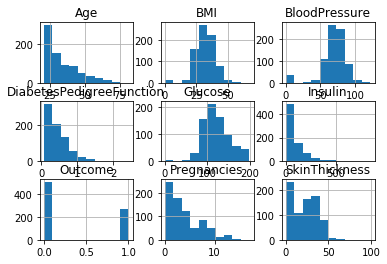

In [7]:
#display histograms
df.hist()
plt.show()

/Users/gloriausanase/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/gloriausanase/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


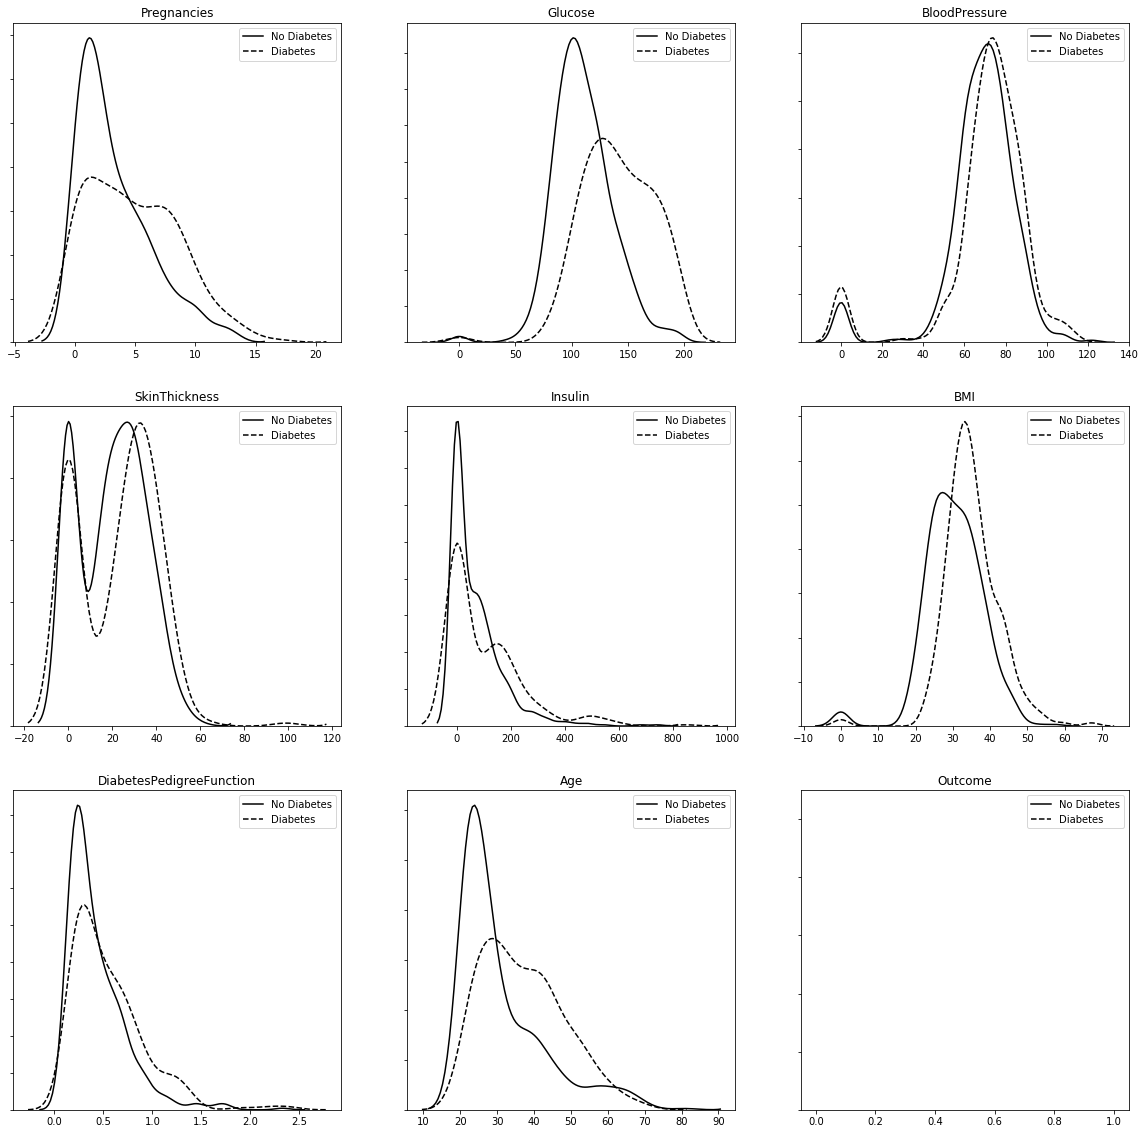

In [8]:
# show density plot

# create a subplot of 3 x 3
plt.subplots(3,3,figsize=(20,20))

# Plot a density plot for each variable
for idx, col in enumerate(df.columns):
    ax = plt.subplot(3,3,idx+1)
    ax.yaxis.set_ticklabels([])
    sns.distplot(df.loc[df.Outcome == 0][col], hist=False, axlabel= False, kde_kws={'linestyle':'-', 'color':'black', 'label':"No Diabetes"})
    sns.distplot(df.loc[df.Outcome == 1][col], hist=False, axlabel= False, kde_kws={'linestyle':'--', 'color':'black', 'label':"Diabetes"})
    ax.set_title(col)

In [9]:
#Data prepocessing

In [10]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


In [11]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [12]:
print("Number of rows with 0 values for each variable") 
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0] 
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [13]:
# Replace 0 values with nan
df['Glucose'] = df['Glucose'].replace(0, np.nan) 
df['BloodPressure'] = df['BloodPressure'].replace(0, np.nan) 
df['SkinThickness'] = df['SkinThickness'].replace(0, np.nan) 
df['Insulin'] = df['Insulin'].replace(0, np.nan)
df['BMI'] = df['BMI'].replace(0, np.nan)

In [14]:
#Confirm that there are no 0 values except the pregnancies column
print("Number of rows with 0 values for each variable") 
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0] 
    print(col + ": " + str(missing_rows))

Number of rows with 0 values for each variable
Pregnancies: 111
Glucose: 0
BloodPressure: 0
SkinThickness: 0
Insulin: 0
BMI: 0
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [15]:
# Replace the NaN values with the mean of the non-missing values. 
#using the handy fillna() function in pandas:
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mean()) 
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mean()) 
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mean()) 
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mean()) 
df['BMI'] = df['BMI'].fillna(df['BMI'].mean())

In [16]:
#Data Standardization

In [17]:
#preprocessing function from scikit-learn to scale data
df_scaled = preprocessing.scale(df)

In [18]:
#convert the object returned by the preprocessing function into a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [19]:
df_scaled['Outcome'] = df['Outcome']
df = df_scaled

In [20]:
print(df.describe().loc[['mean', 'std','max'],].round(2).abs())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
mean         0.00     0.00            0.0           0.00     0.00  0.00   
std          1.00     1.00            1.0           1.00     1.00  1.00   
max          3.91     2.54            4.1           7.95     8.13  5.04   

      DiabetesPedigreeFunction   Age  Outcome  
mean                      0.00  0.00     0.35  
std                       1.00  1.00     0.48  
max                       5.88  4.06     1.00  


In [21]:
#Splitting the data into training, testing, and validation sets

In [22]:
# Separate dataset into X(input features) and Y (target variables)
X = df.loc[:, df.columns != 'Outcome'] 
y = df.loc[:, 'Outcome']

In [23]:
#First split: training set 80% and testing set 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
#Second split to create the final training set and the validation set:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [25]:
#Model building

In [29]:
# Create a new sequential class
model = Sequential()

#Build model
model.add(Dense(32, activation='relu', input_dim=8))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

#Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train model for 200 epochs
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
491/491 [==============================] - 1s 2ms/step - loss: 0.6300 - accuracy: 0.6762
Epoch 2/200
491/491 [==============================] - 0s 90us/step - loss: 0.5833 - accuracy: 0.7149
Epoch 3/200
491/491 [==============================] - 0s 81us/step - loss: 0.5485 - accuracy: 0.7332
Epoch 4/200
491/491 [==============================] - 0s 93us/step - loss: 0.5206 - accuracy: 0.7536
Epoch 5/200
491/491 [==============================] - 0s 96us/step - loss: 0.5006 - accuracy: 0.7536
Epoch 6/200
491/491 [==============================] - 0s 89us/step - loss: 0.4860 - accuracy: 0.7536
Epoch 7/200
491/491 [==============================] - 0s 79us/step - loss: 0.4742 - accuracy: 0.7637
Epoch 8/200
491/491 [==============================] - 0s 100us/step - loss: 0.4654 - accuracy: 0.7699
Epoch 9/200
491/491 [==============================] - 0s 96us/step - loss: 0.4581 - accuracy: 0.7760
Epoch 10/200
491/491 [==============================] - 0s 84us/step - loss: 0.453

491/491 [==============================] - 0s 102us/step - loss: 0.2596 - accuracy: 0.9022
Epoch 159/200
491/491 [==============================] - 0s 95us/step - loss: 0.2580 - accuracy: 0.8961
Epoch 160/200
491/491 [==============================] - 0s 100us/step - loss: 0.2580 - accuracy: 0.9002
Epoch 161/200
491/491 [==============================] - 0s 94us/step - loss: 0.2570 - accuracy: 0.9043
Epoch 162/200
491/491 [==============================] - 0s 101us/step - loss: 0.2564 - accuracy: 0.9002
Epoch 163/200
491/491 [==============================] - 0s 112us/step - loss: 0.2554 - accuracy: 0.8961
Epoch 164/200
491/491 [==============================] - 0s 83us/step - loss: 0.2533 - accuracy: 0.8982
Epoch 165/200
491/491 [==============================] - 0s 95us/step - loss: 0.2528 - accuracy: 0.9022
Epoch 166/200
491/491 [==============================] - 0s 101us/step - loss: 0.2536 - accuracy: 0.8982
Epoch 167/200
491/491 [==============================] - 0s 100us/step - 

In [30]:
#Result Analysis

In [31]:
#Testing accuracy
scores = model.evaluate(X_train, y_train) 
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(X_test, y_test) 
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

491/491 [==============================] - 0s 279us/step
Training Accuracy: 92.67%

154/154 [==============================] - 0s 87us/step
Testing Accuracy: 76.62%



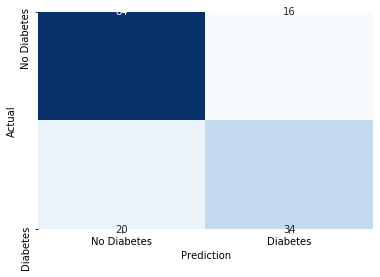

<Figure size 432x288 with 0 Axes>

In [33]:
#Confusion Matrix
y_test_pred = model.predict_classes(X_test) 
c_matrix = confusion_matrix(y_test, y_test_pred) 
ax = sns.heatmap(c_matrix, annot=True,xticklabels=['No Diabetes','Diabetes'], yticklabels=['No Diabetes','Diabetes'], cbar=False, cmap='Blues')
ax.set_xlabel("Prediction") 
ax.set_ylabel("Actual")
plt.show()
plt.clf()

In [36]:
#ROC Curve 
#Get the predicted probabilities of each class using the predict function
y_test_pred_probs = model.predict(X_test)

In [37]:
#ROC curve function
FPR, TPR, _ = roc_curve(y_test, y_test_pred_probs)

Text(0, 0.5, 'True Positive Rate')

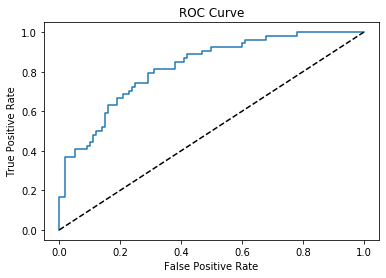

In [39]:
#plot values
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1],'--', color='black') #diagonal line 
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')